In [ ]:
# run the header that sets up the environment

already_run = globals().get("already_run", False)
if not (already_run):
    already_run = True
    %run header.ipynb

In [7]:
y0 = {
    "PQ": 11.027139850905353,       "PC": 1.8895071932002812,           "Fd": 3.8690237263896705,
    "ATP": 1.620195002854852,       "NADPH": 0.48821037006737366,       "H": 0.0022147075094596015,
    "LHC": 0.8023074419510501,      "Psbs": 0.9607146039898598,         "Vx": 0.950783616933656,
    "PGA": 0.9913970817549008,      "BPGA": 0.0005355311557548053,      "GAP": 0.0062630116252017295,
    "DHAP": 0.13778623933075737,    "FBP": 0.006126990841013743,        "F6P": 0.31166103888161867,
    "G6P": 0.7168203893211117,      "G1P": 0.041575582577936025,        "SBP": 0.01311315151803723,
    "S7P": 0.15782894767619207,     "E4P": 0.00732079113061801,         "X5P": 0.022396849486562384,
    "R5P": 0.03751472214765548,     "RUBP": 0.13153657267999222,        "RU5P": 0.015005888732707041,
    "MDA": 5.85270097771621e-06,    "ASC": 9.999994138785292,           "H2O2": 3.4273920330125316e-06,
    "DHA": 8.513863740903352e-09,   "GSH": 9.999999991725186,           "GSSG": 4.137406632226743e-09,
    "TR_ox": 0.9,                   "E_inactive": 4.7368421052631575,
    "P700FA": 1.4731,            #eq at pfd 800       #"PSItot": 2.5, (in parameter vector of Matuszynska)
    "P700+FA-": 0.0131,
    "P700FA-": 0.0177,
}

In [ ]:
def DIRK(s: Simulator,time_relax: float, relax_pfd: float,
          pfd_illumination: float, pre_dark_time:float, post_dark_time):
     t = it.accumulate([pre_dark_time,time_relax,post_dark_time])
     for time, pfd in tqdm(zip(t
                         ,[pfd_illumination,relax_pfd,pfd_illumination])):
          s.update_parameter("pfd", pfd)
          print(pfd)
          print(time)
          s.simulate(time)


In [13]:
def PIRK(s: Simulator,time_relax: float, ss_pfd: float, time_pulse: float,
            pfd_dark:float, pfd_pulse: float, time_delay= bool):
    s.update_parameter("pfd", ss_pfd)
    s.simulate(100)
    s.update_parameter("pfd", pfd_dark)
    s.simulate(160)
    pfds = list([pfd_pulse,pfd_dark]*4)
    if time_delay == True:
        t= list(it.accumulate(it.chain.from_iterable((time_pulse, time_relax*i) for i in [1,2,4,0.5])))
    if time_delay == False:
        t = list(it.accumulate(it.chain.from_iterable((time_pulse,time_relax) for i in range(4))))
    
    for i in range(len(t)):
        t[i] = t[i]+160
    #print(t)
    #print(pfds)
    for t,pfd in tqdm(zip(t,pfds)):
        s.update_parameter("pfd", pfd)
        s.simulate(t)
        print(t,pfd)
        

In [14]:
s1 = Simulator(m)
s1.initialise(y0)
s1.clear_results()
DIRK(s1,time_relax=0.1, relax_pfd=10, pfd_illumination=300, 
     pre_dark_time=1200, post_dark_time=0.1)

0it [00:00, ?it/s]

300
1200
10
1200.1
300
1200.1999999999998


In [15]:
c = s1.get_full_results_df()
v = s1.get_fluxes_df()

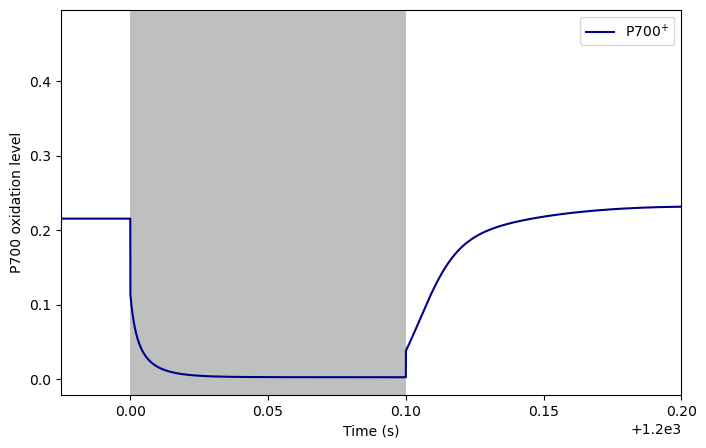

In [16]:
"""
Prior to the measurements, attached leaves of Col-0(black curves) and cfq (red curves) 
were illuminated for at least 20 min with  300 µmol photons·m−2·s−1at and low(50 ppm, thick curves) CO2. 
Kinetics of absorbance changes were measuredusing the IDEASpec device as described in the text. 
As shown in the coloredbands at the top of the graph, the actinic illumination was switched off for 100 ms time intervals 
starting at time zero. Data is plotted as the fraction of P700 oxidized determined by the differences 
in absorbance changes at810–940 nm, normalized to the maximum absorbance changes observedunder 
far red illumination followed by a saturating ﬂash

https://www.researchgate.net/publication/316674887_Chloroplast_ATP_Synthase_Modulation_of_the_Thylakoid_Proton_Motive_Force_Implications_for_Photosystem_I_and_Photosystem_II_Photoprotection
"""
fig,ax=plt.subplots(figsize=(8,5))

ax.plot(c["A2"], label = "P700$^{+}$", color="darkblue")


ax.set(xlim=(1199.975,1200.2),
       xlabel=("Time (s)"),
       ylabel=("P700 oxidation level"))
       
ax.axvspan(1200, 1200.1, color='grey', alpha=0.5, lw=0)
ax.legend()

plt.show()

In [11]:
## possible to calculate pmf with everything thats given to get ot their
#compatable measurement

## or calculate from pmf to a comparable unit we can measure?

In [12]:
##weird stuff: when until 1000 one of the peaks doesnt happen, idk why?
    #ATP synthase looks rough

In [18]:
##to be similar to behavior time_relax=0.05, time_pulse = 0.005, pfd_dark=100, pfd_pulse=450, normal_light=400

s1 = Simulator(m)
s1.initialise(y0)
s1.clear_results()
PIRK(s1,time_relax=0.06, ss_pfd=90, time_pulse=0.003, 
     pfd_dark=10, pfd_pulse=1180, time_delay=True)

0it [00:00, ?it/s]

160.003 1180
160.063 10
160.066 1180
160.186 10
160.189 1180
160.429 10
160.432 1180
160.462 10


In [19]:
c = s1.get_full_results_df()
v = s1.get_fluxes_df()

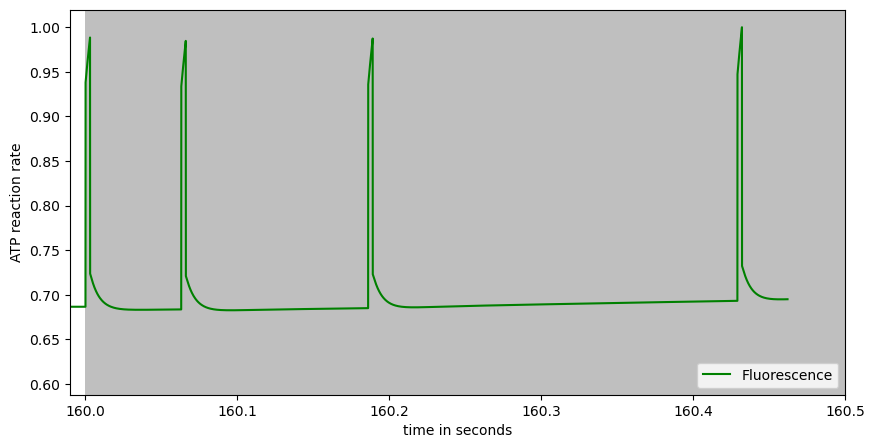

In [22]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(c["Fluo"]/max(c["Fluo"]), label="Fluorescence", color="green")
ax.set(ylabel=("Fluorescence"))
ax.set(xlim=(159.99,160.5),
       #ylim=(0.16,0.5),
       xlabel=("time in seconds"),
       ylabel=("ATP reaction rate"))
ax.axvspan(160, 200, color='grey', alpha=0.5, lw=0)
ax.legend()
plt.show()

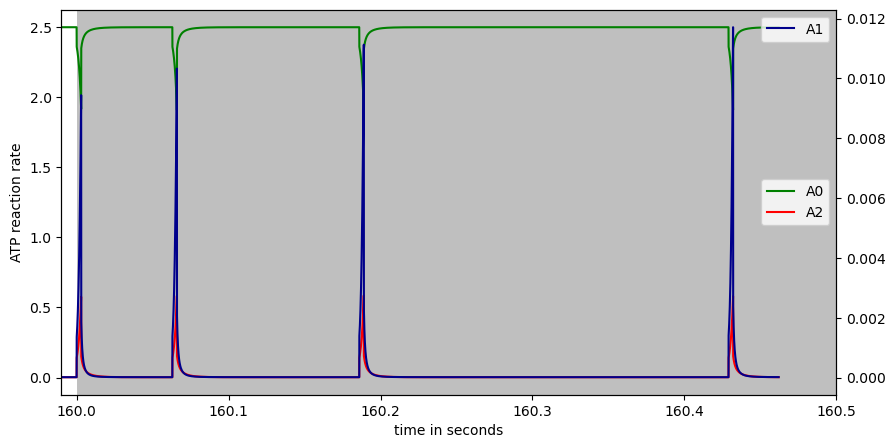

In [23]:
fig,ax=plt.subplots(figsize=(10,5))
ax2= ax.twinx()
ax.plot(c["A0"], label="A0", color="green")
ax2.plot(c["A1"], label="A1", color="darkblue")
ax.plot(c["A2"], label="A2", color ="red")
#ax.plot(v["vATPsynthase"], color="red")
ax.set(ylabel=("Fluorescence"))
ax.set(xlim=(159.99,160.5),
       #ylim=(0.16,0.5),
       xlabel=("time in seconds"),
       ylabel=("ATP reaction rate"))
ax.axvspan(160, 200, color='grey', alpha=0.5, lw=0)
ax.legend()
ax2.legend()
plt.show()

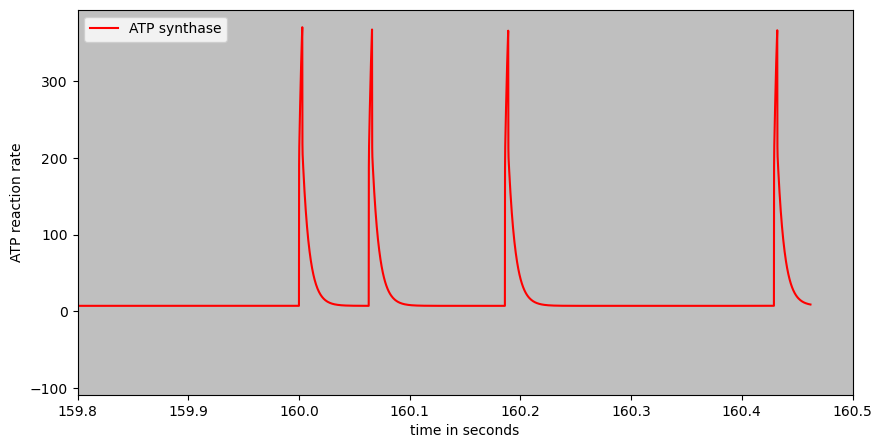

In [24]:
fig,ax=plt.subplots(figsize=(10,5))
#ax.plot(c["Fluo"])
ax.plot(v["vATPsynthase"], color="red", label="ATP synthase")

ax.set(xlim=(159.8,160.5),
       #ylim=(0.16,0.5),
       xlabel=("time in seconds"),
       ylabel=("ATP reaction rate"))
#ax.set_xticklabels(["1200","1300","1400","1500","1600","1700","1800"])
ax.axvspan(100, 660, color='grey', alpha=0.5, lw=0)
ax.legend()
plt.show()

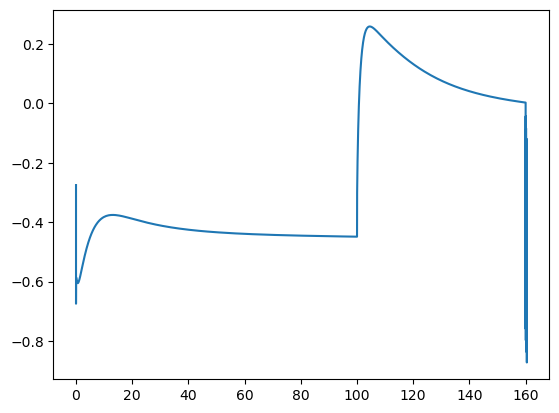

In [25]:
plt.plot(-np.log(s1.get_full_results_df()["Keq_ATPsynthase"])/m.get_parameter("RT"))


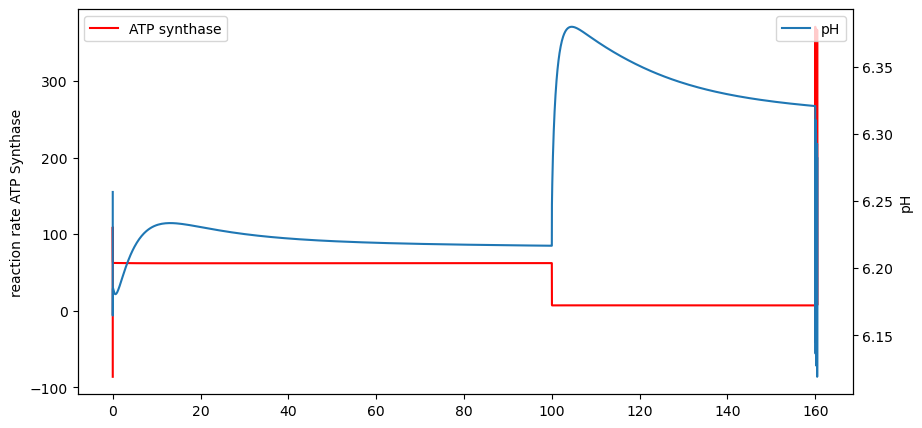

In [35]:
fig,ax=plt.subplots(figsize=(10,5))
ax2 = ax.twinx()
ax2.plot(c["pH"], label="pH")
ax.plot(v["vATPsynthase"], color="red",label="ATP synthase")
ax.set(ylabel=("reaction rate ATP Synthase"))
#ax.set(xlim=(159,160.5),
       #ylim=(0.16,0.5),
       #xlabel=("time in seconds"),
       #ylabel=("ATP reaction rate"))
ax2.set(ylabel=("pH"))
#ax.set_xticklabels(["1200","1300","1400","1500","1600","1700","1800"])
#ax.axvspan(150,240, color='grey', alpha=0.5, lw=0)
ax.legend()
ax2.legend()
plt.show()

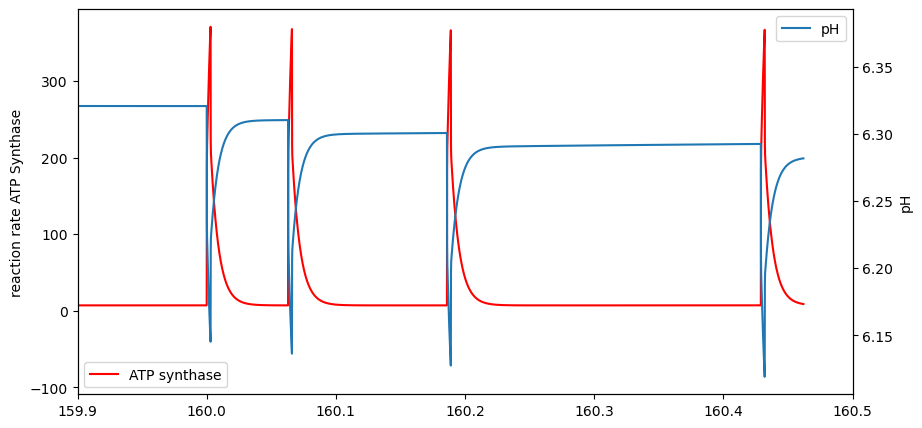

In [37]:
fig,ax=plt.subplots(figsize=(10,5))
ax2 = ax.twinx()
ax2.plot(c["pH"], label="pH")
ax.plot(v["vATPsynthase"], color="red",label="ATP synthase")
ax.set(ylabel=("reaction rate ATP Synthase"))
ax.set(xlim=(159.9,160.5))
ax2.set(ylabel=("pH"))
#ax.set_xticklabels(["1200","1300","1400","1500","1600","1700","1800"])
#ax.axvspan(150,240, color='grey', alpha=0.5, lw=0)
ax.legend()
ax2.legend()
plt.show()

In [38]:
c = s1.get_full_results_df()
f = s1.get_fluxes_df()
B0 = s1.get_variable("B0")
B2 = s1.get_variable("B2")
ADP = 1-c["ATP_norm"]

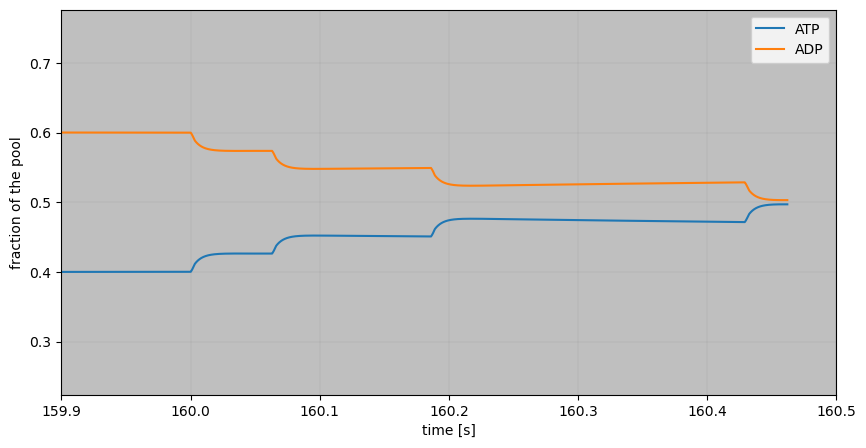

In [40]:
###ATP and ADP
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(c["ATP_norm"], label= "ATP")
ax.set(xlim=(159.9,160.5))

ax.plot(ADP, label = "ADP")
plt.ylabel("fraction of the pool")
plt.xlabel("time [s]")
plt.axvspan(150, 240, color='grey', alpha=0.5, lw=0)
plt.grid(color='grey', linestyle='-', linewidth=0.1)
plt.legend(loc="best")
plt.show()

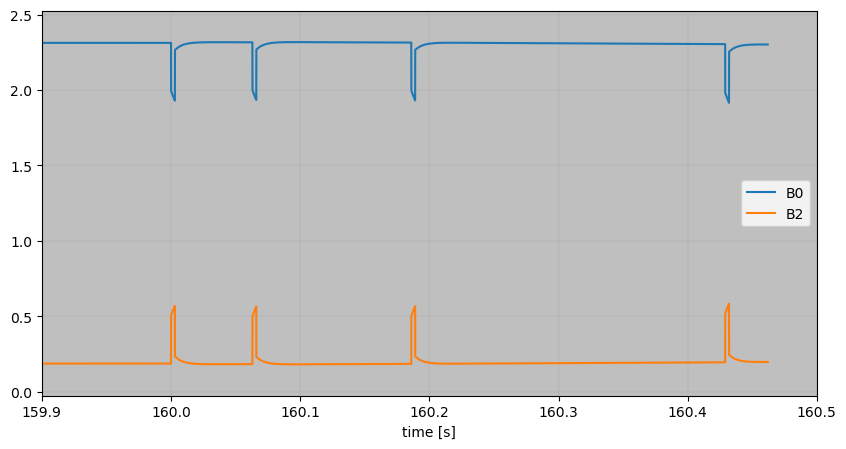

In [43]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(f.index, B0, label="B0")
ax.plot(f.index, B2, label="B2")
ax.set(xlim=(159.9,160.5))
plt.xlabel("time [s]")
plt.axvspan(100, 650, color='grey', alpha=0.5, lw=0)
plt.grid(color='grey', linestyle='-', linewidth=0.1)
plt.legend(loc="best")